In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


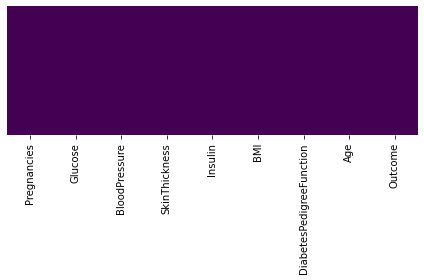

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  #this function gives heatmap of all nan values
   plt.figure(figsize=(6,4))
   sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
   plt.tight_layout()
   return plt.show()
get_heatmap(df)

In [ ]:
#drop unrequired columns
df = df.drop('Pregnancies',axis=1)
df = df.drop('SkinThickness',axis=1)

In [ ]:
df.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1


In [ ]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

# Standardizing the data apart from the Class column
data_scaled=df.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

In [ ]:
data_scaled

,0,1,2,3,4,5
0,0.848324,0.149641,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...
763,-0.622642,0.356432,0.870031,0.115169,-0.908682,2.532136
764,0.034598,0.046245,-0.692891,0.610154,-0.398282,-0.531023
765,0.003301,0.149641,0.279594,-0.735190,-0.685193,-0.275760
766,0.159787,-0.470732,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
data_scaled.columns=['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:
data_scaled.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.765836,1.409746,5.484909,-0.020496


In [ ]:
data_scaled['Class'] = df.Outcome

In [ ]:
data_scaled

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.848324,0.149641,-0.692891,0.204013,0.468492,1.425995,1
1,-1.123396,-0.160546,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.943724,-0.263941,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.998208,-0.160546,0.123302,-0.494043,-0.920763,-1.041549,0
4,0.504055,-1.504687,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...
763,-0.622642,0.356432,0.870031,0.115169,-0.908682,2.532136,0
764,0.034598,0.046245,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.003301,0.149641,0.279594,-0.735190,-0.685193,-0.275760,0
766,0.159787,-0.470732,-0.692891,-0.240205,-0.371101,1.170732,1


In [ ]:
data_scaled = data_scaled[data_scaled['Class'].notna()]


In [ ]:
#Loading the data
X = data_scaled.iloc[:,0:6]
Y = data_scaled.iloc[:,6:7]

In [ ]:
#Splitting the dataset
#Splitting the dataset into Train & Test Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
X_train

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
501,-1.154694,0.149641,-0.692891,0.660922,-0.618751,-0.445935
371,-0.090591,-0.263941,0.079887,-4.060474,3.802703,-1.041549
634,-0.904316,-0.367337,-0.692891,-0.773265,-0.920763,-0.190672
221,1.161295,1.080200,-0.692891,-0.049826,1.006073,2.787399
12,0.566649,0.563223,-0.692891,-0.620962,2.926869,2.021610
...,...,...,...,...,...,...
534,-1.373774,-0.677523,-0.206648,0.165937,2.353046,-0.786286
584,0.097192,0.356432,4.516847,-0.417892,0.649699,1.596171
493,0.128489,0.046245,0.366423,-0.392508,2.029893,1.000557
527,-0.153185,0.253036,0.218813,-0.722498,-1.101970,-0.786286


In [ ]:
y_train

,Class
501,0
371,0
634,0
221,1
12,0
...,...
534,0
584,1
493,1
527,0


In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
y_test

,Class
158,0
251,0
631,0
757,1
689,1
...,...
225,0
387,1
120,1
7,0


In [ ]:
y_train_pred=clf.predict(X_train)

In [ ]:
y_train_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [ ]:
y_actual=np.array(y_train)
y_actual.flatten()

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [ ]:
#Evaluating the Model
#Train set results
data = {'y_pred': y_train_pred, 'y_actual': y_actual.flatten()}

data=pd.DataFrame(data)
data

,y_pred,y_actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
532,0,0
533,0,1
534,0,1
535,0,0


In [ ]:
df1=data_scaled

In [ ]:
df1

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.848324,0.149641,-0.692891,0.204013,0.468492,1.425995,1
1,-1.123396,-0.160546,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.943724,-0.263941,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.998208,-0.160546,0.123302,-0.494043,-0.920763,-1.041549,0
4,0.504055,-1.504687,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...
763,-0.622642,0.356432,0.870031,0.115169,-0.908682,2.532136,0
764,0.034598,0.046245,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.003301,0.149641,0.279594,-0.735190,-0.685193,-0.275760,0
766,0.159787,-0.470732,-0.692891,-0.240205,-0.371101,1.170732,1


In [ ]:
import math
# Initializing all the weights as 0
W0_new = 0
W1_new = 0
W2_new = 0
W3_new = 0
W4_new = 0
W5_new = 0
W6_new = 0

# Alpha - learning rate
a = 0.03

# MSE
MSE = np.array([])

#sigmoid function 
def sigmoid(output):
    z = 1/(1+math.exp(-output)) 
    return z
for epoch in range(5):
    
    p_preds = np.array([])
    p_pred_exps = np.array([])
    error = np.array([])
    error_x1 = np.array([])
    error_x2 = np.array([])
    error_x3 = np.array([])
    error_x4 = np.array([])
    error_x5 = np.array([])
    error_x6 = np.array([])
    p_class = np.array([])
    
    # Assigning all the weights their new values after an epoch:
    W0 = W0_new
    W1 = W1_new
    W2 = W2_new
    W3 = W3_new
    W4 = W4_new
    W5 = W5_new
    W6 = W6_new
    
    # Iterating through the Df and calculating all parameters:
    for row in df1.itertuples():
        
        #The predicted value:
        p_pred = W0 + W1*row[1]+ W2*row[2] + W3*row[3] + W4*row[4] + W5*row[5] + W6*row[6]
        p_preds = np.append(p_preds, p_pred)
        
        # Predicted value after applying the sigmoid function
        p_pred_exp = sigmoid(p_pred)
        p_pred_exps = np.append(p_pred_exps, p_pred_exp)   
        
        # Bifurcating the predicted class as per its probability to be the default class
    
        if p_pred_exp > 0.5:
            p_class = np.append(p_class,1.0)
        else:
            p_class = np.append(p_class,0.0)
            
            
    # The error in prediction
    error = p_pred_exps - df1.Class 
    
    # Pre-calculating the error*x values for all the weights:
    error_x1 = error*df1['Glucose']
    error_x2 = error*df1['BloodPressure']
    error_x3 = error*df1['Insulin']
    error_x4 = error*df1['BMI']
    error_x5 = error*df1['DiabetesPedigreeFunction']
    error_x6 = error*df1['Age']
    
    # Calculating MSE
    MSE_val = (error).mean()
    MSE = np.append(MSE,MSE_val)
    
    # Updating the weights
    W0_new = W0 - a*np.sum(error)
    W1_new = W1 - a*np.sum(error_x1)
    W2_new = W2 - a*np.sum(error_x2)
    W3_new = W3 - a*np.sum(error_x3)
    W4_new = W4 - a*np.sum(error_x4)
    W5_new = W5 - a*np.sum(error_x5)
    W6_new = W5 - a*np.sum(error_x6)

    # Adding the predicted class as a separate column to check for performance:
df1['pred_class']=p_class

# Check if any class has been mis classified

In [ ]:
df1

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,pred_class
0,0.848324,0.149641,-0.692891,0.204013,0.468492,1.425995,1,1.0
1,-1.123396,-0.160546,-0.692891,-0.684422,-0.365061,-0.190672,0,0.0
2,1.943724,-0.263941,-0.692891,-1.103255,0.604397,-0.105584,1,1.0
3,-0.998208,-0.160546,0.123302,-0.494043,-0.920763,-1.041549,0,0.0
4,0.504055,-1.504687,0.765836,1.409746,5.484909,-0.020496,1,1.0
...,...,...,...,...,...,...,...,...
763,-0.622642,0.356432,0.870031,0.115169,-0.908682,2.532136,0,1.0
764,0.034598,0.046245,-0.692891,0.610154,-0.398282,-0.531023,0,0.0
765,0.003301,0.149641,0.279594,-0.735190,-0.685193,-0.275760,0,0.0
766,0.159787,-0.470732,-0.692891,-0.240205,-0.371101,1.170732,1,0.0


In [ ]:
# True Positives
print('TP: ',df1.Class[(df1.Class==1) & (df1.pred_class==1)].count())
# False Positives
print('FP: ',df1.Class[(df1.Class==0) & (df1.pred_class==1)].count())
#True Negatives
print('TN: ',df1.Class[(df1.Class==0) & (df1.pred_class==0)].count())
#False Negatives
print('FN: ',df1.Class[(df1.Class==1) & (df1.pred_class==0)].count())

TP:  169
FP:  85
TN:  415
FN:  99


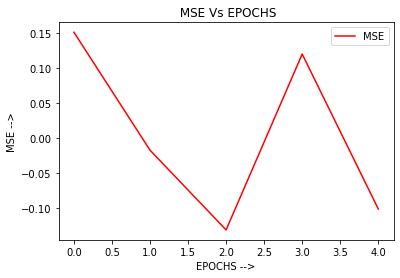

In [ ]:
import matplotlib.pyplot as plt

plt.plot(MSE,label='MSE',color='red')

# Add labels and title
plt.title(" MSE Vs EPOCHS")
plt.xlabel("EPOCHS -->")
plt.ylabel("MSE -->")
 
plt.legend()
plt.show()